# Lab Session (week 3): Advertising Data

* In this lab session we are going to look at how to answer questions involing the use of simple and multiple linear regression in Python. 

* The questions are based on the book "An introduction to Statistical Learning" by James et al. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
# import seaborn as sns

In [15]:
#data_advert = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
#data_advert.head()

data_advert = pd.read_csv('advertising_data.csv', index_col=0)
data_advert.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Simple Linear Regression

Please load and plot the Advertising Data and answer the following questions: 

1.	Does the relationship between TV budge and sales seem linear?

2.	How well does the least-square regression line fit the data? What is the proportion of the variability in sales that can be explained using TV budge?

3.	How big is the coefficients relative to the standard error?

4.	What is 95% CI for the slope?

5.	Is there a relationship between TV budget and sales?


[0.04753664 7.03259355]


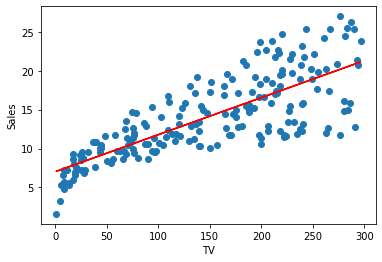

In [3]:
def my_fit(x,y):
    my_coef = np.polyfit(x,y,1)
    my_val  = np.poly1d(my_coef) # create an object
    return my_val(x)

print(np.polyfit(data_advert.TV,data_advert.sales,1))

plt.scatter(data_advert.TV,data_advert.sales)
plt.plot(data_advert.TV,my_fit(data_advert.TV,data_advert.sales), color='red',   label='fit')
plt.xlabel('TV')
plt.ylabel('Sales');

In [4]:
results = smf.ols('sales ~ TV', data=data_advert).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           1.47e-42
Time:                        20:50:40   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [5]:
results = smf.ols('sales ~ radio', data=data_advert).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           4.35e-19
Time:                        20:50:43   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.0

In [6]:
results = smf.ols('sales ~ newspaper', data=data_advert).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Wed, 03 Nov 2021   Prob (F-statistic):            0.00115
Time:                        20:50:46   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.0

## Multiple Linear regression

Please load and plot the Advertising Data and answer the following questions: 


1.	Is there any relationship between advertising budget and sales? (Hint: F statistics)

2.	Which media contribute to sales most? How ‘reliable’ is this conclusion? (Hint: regression coefficients, CI)

3.	How much what we see in the data do we explain using linear regression model? (Hint: RSE, R^2, adj R^2)


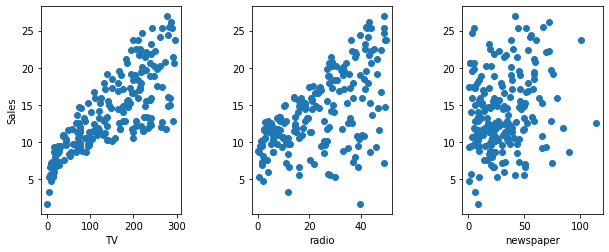

In [7]:
plt.subplot(131)
plt.scatter(data_advert.TV,data_advert.sales)
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(132)
plt.scatter(data_advert.radio,data_advert.sales)
plt.xlabel('radio')

plt.subplot(133)
plt.scatter(data_advert.newspaper,data_advert.sales)
plt.xlabel('newspaper')
plt.subplots_adjust(top=0.8, bottom=0.08, left=0.0, right=1.3, hspace=5, wspace=0.5)

In [8]:
results = smf.ols('sales ~ TV + radio + newspaper', data=data_advert).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           1.58e-96
Time:                        20:50:55   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [9]:
results = smf.ols('sales ~ TV + radio', data=data_advert).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           4.83e-98
Time:                        20:50:58   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0